# Unsupervised learning - clustering

# 0. Reading in png-images into a dataset

This is the code how i reverted the 100 png-images to a dataset. You don't need to know this. It is an illustration in case you will need/want to do something like this in a project later on.



# 1. loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#importing dataset
import pickle
with open("pickled_simpson.pkl", "br") as fh:
    data = pickle.load(fh)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 120000 entries, 0_1 to 2_40000
dtypes: float64(120000)
memory usage: 473.3 MB


In [4]:
data.iloc[1,:].describe()

count    120000.000000
mean          0.557635
std           0.297214
min           0.000000
25%           0.313726
50%           0.705882
75%           0.792157
max           0.992157
Name: 1, dtype: float64

Note that the values have already been normalized (between 0 and 1), so there is no need to normalize anymore.

In [5]:
# 2. K-means clustering

# 2. K-means clustering
## 2.1 Colour
We will now do clustering: in an unsupervised way find clusters of data which are more alike internally, and more dissimilar from other clusters.

Because we know we have 5 characters , we will ask k-Means to look for 5 clusters within the entire data.

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=130)
kmeans.fit(data)
pred = kmeans.predict(data)

In [7]:
pred

array([4, 4, 3, 1, 3, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1,
       3, 0, 0, 0, 0, 2, 3, 3, 4, 3, 3, 2, 3, 2, 0, 3, 2, 2, 4, 2, 2, 3,
       4, 2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 1, 1, 4, 0, 0, 0, 2, 4, 4, 3, 1,
       2, 1, 3, 3, 1, 0, 0, 0, 0, 4, 4, 3, 3, 1, 1, 0, 3, 4, 2, 2, 3, 2,
       3, 4, 4, 4, 4, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 4,
       3, 3, 4, 3, 3, 4, 4, 3, 1, 0, 0, 0, 2, 4, 3, 0, 3, 3, 4, 3, 3, 3,
       3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 0, 4, 3, 3, 3, 4, 4, 4, 3, 0, 1,
       4, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 2, 4, 4, 3, 3, 1, 4, 4, 3, 4, 3,
       3, 4, 2, 3, 1, 4, 3, 3, 3, 3, 1, 0, 2, 4, 3, 3, 3, 3, 3, 3, 4, 3,
       1, 1, 3, 2, 4, 1, 4, 4, 2, 4, 2, 1, 0, 3, 3, 1, 0, 3, 3, 3, 3, 1,
       0, 3, 0, 4, 2, 0, 0, 0, 4, 2, 1, 1, 3, 3, 3, 3, 4, 2, 0, 1, 1, 4,
       0, 3, 0, 1, 4, 0, 2, 1, 3, 4, 0, 1, 1, 3, 0, 2, 1, 4, 2, 2, 3, 2,
       2, 2, 2, 4, 3, 2, 4, 2, 3, 1, 0, 0, 0, 0, 1, 1, 0, 1, 3, 2, 3, 0,
       1, 1, 1, 0, 3, 3, 0, 0, 0, 0, 1, 1, 2, 3, 1,

In [8]:
cluster_0 = np.arange(0,data.shape[0])[pred == 0]
cluster_1 = np.arange(0,data.shape[0])[pred == 1]
cluster_2 = np.arange(0,data.shape[0])[pred == 2]
cluster_3 = np.arange(0,data.shape[0])[pred == 3]
cluster_4 = np.arange(0,data.shape[0])[pred == 4]

In [9]:
import collections, numpy
collections.Counter(pred)

Counter({np.int32(3): 174,
         np.int32(4): 109,
         np.int32(1): 89,
         np.int32(2): 79,
         np.int32(0): 66})

Let's take a look at the first 25 pictures for each cluster to see how it performed.

<Figure size 1500x1500 with 0 Axes>

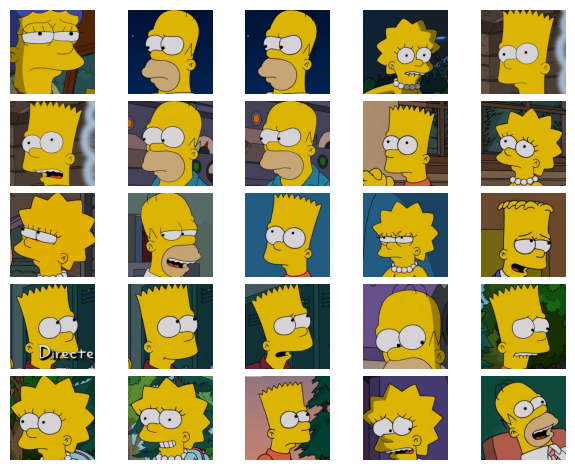

In [10]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_0[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

We see homer, Bart and Lisa in one cluster. This is not good

<Figure size 1000x1000 with 0 Axes>

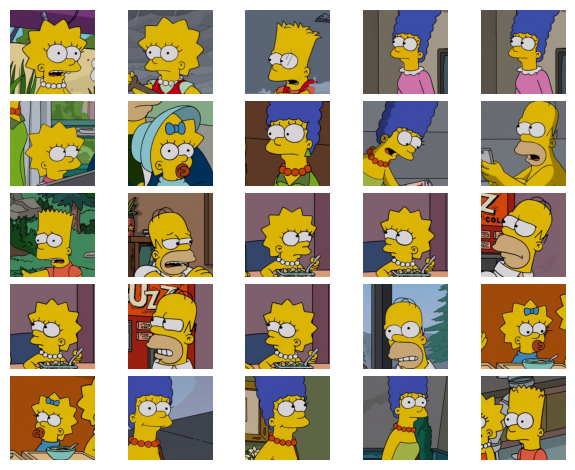

In [11]:
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_1[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Mainly close-ups, but now even four different characters.

<Figure size 1000x1000 with 0 Axes>

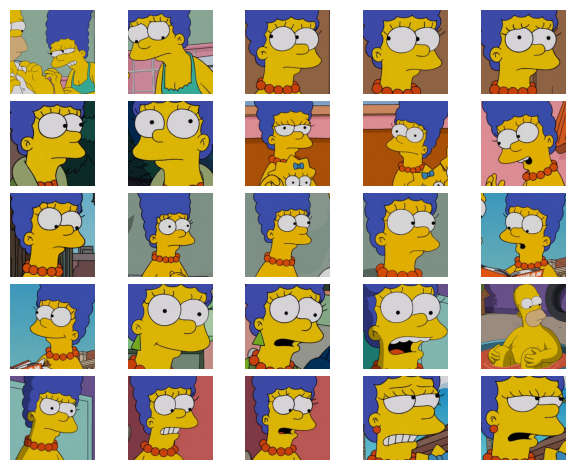

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_2[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Not the pattern I hoped to see, but I am seeing a pattern...

<Figure size 1000x1000 with 0 Axes>

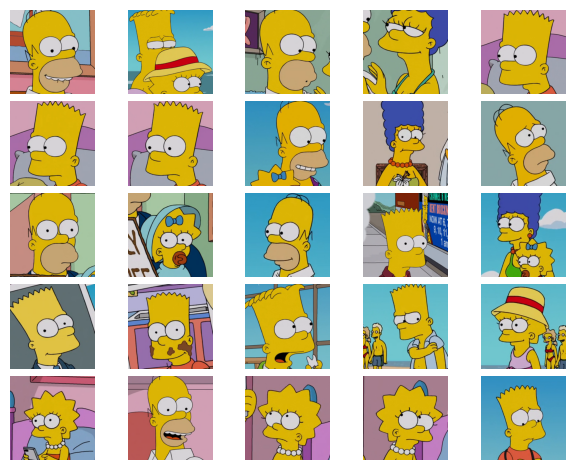

In [13]:
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_4[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

See the pattern? Our clustering wasn't only based on the different characters, but also on the background. 

<Figure size 1000x1000 with 0 Axes>

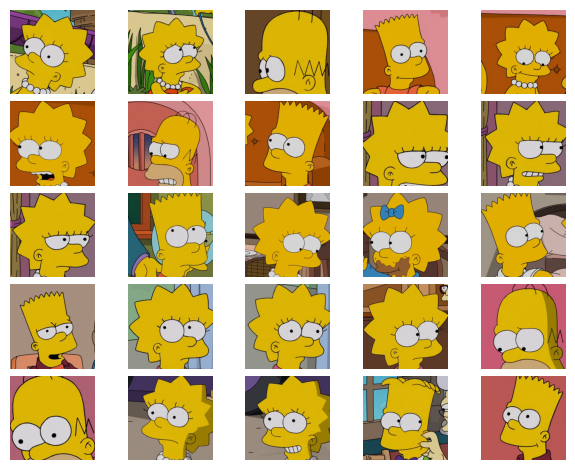

In [14]:
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_3[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Marge! At least one cluster that is clear.

Ok, overall,the classifier doesn't perform great. It is focused too much on the colours in the background. Let's try if the classifier can do better if we use gray-scaled images.

## 2.1 Gray-scale

In [15]:
#importing dataset
import pickle
with open("pickled_simpson_gray.pkl", "br") as fh:
    data_gray = pickle.load(fh)

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=130)
kmeans.fit(data_gray)
pred_gray = kmeans.predict(data_gray)

In [17]:
cluster_0 = np.arange(0,data_gray.shape[0])[pred_gray == 0]
cluster_1 = np.arange(0,data_gray.shape[0])[pred_gray == 1]
cluster_2 = np.arange(0,data_gray.shape[0])[pred_gray == 2]
cluster_3 = np.arange(0,data_gray.shape[0])[pred_gray == 3]
cluster_4 = np.arange(0,data_gray.shape[0])[pred_gray == 4]

import collections, numpy
collections.Counter(pred)

Counter({np.int32(3): 174,
         np.int32(4): 109,
         np.int32(1): 89,
         np.int32(2): 79,
         np.int32(0): 66})

<Figure size 1000x1000 with 0 Axes>

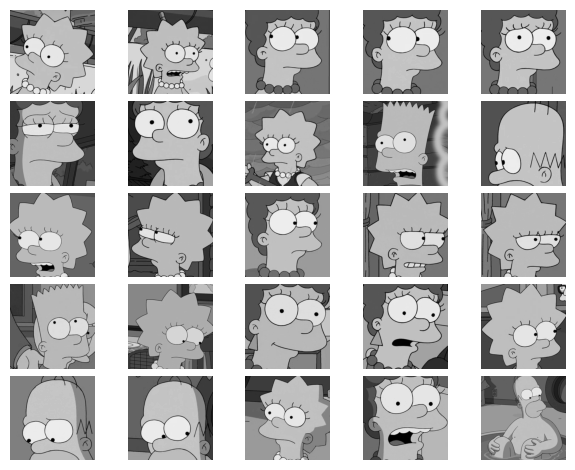

In [18]:
plt.figure(figsize=(10, 10))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data_gray.iloc[cluster_0[i],:]).reshape(200,200)
    ax.imshow(im, cmap= "gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 500x500 with 0 Axes>

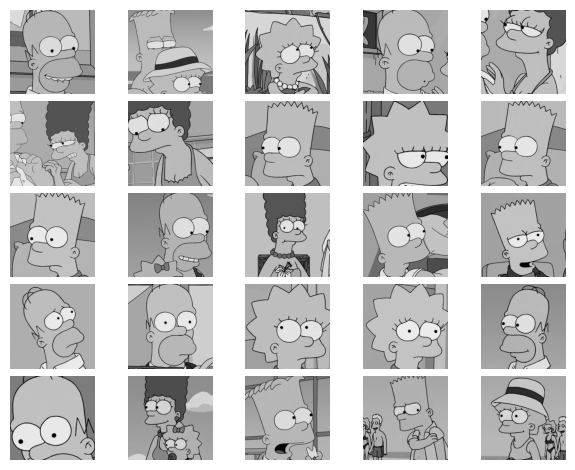

In [19]:
plt.figure(figsize=(5, 5))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data_gray.iloc[cluster_1[i],:]).reshape(200,200)
    ax.imshow(im, cmap= "gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 4000x4000 with 0 Axes>

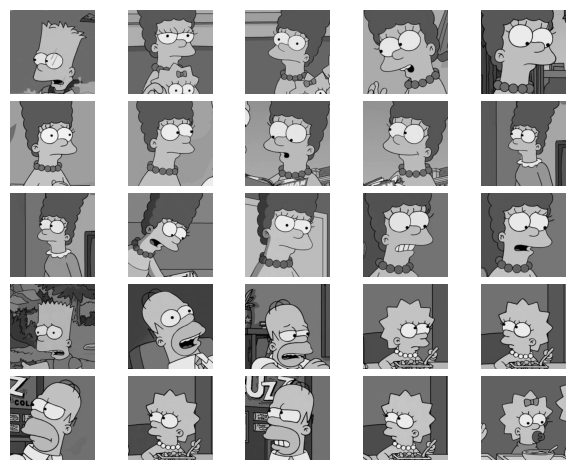

In [20]:
plt.figure(figsize=(40, 40))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data_gray.iloc[cluster_2[i],:]).reshape(200,200)
    ax.imshow(im, cmap= "gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 4000x4000 with 0 Axes>

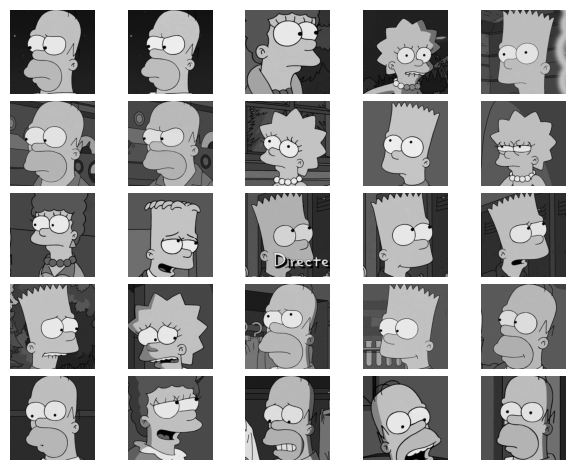

In [21]:
plt.figure(figsize=(40, 40))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data_gray.iloc[cluster_3[i],:]).reshape(200,200)
    ax.imshow(im, cmap= "gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

<Figure size 4000x4000 with 0 Axes>

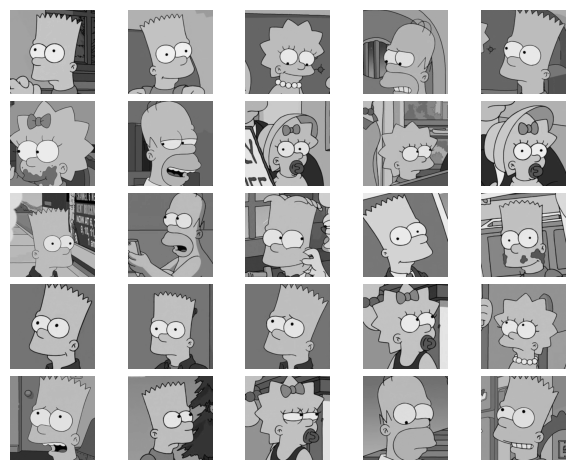

In [22]:
plt.figure(figsize=(40, 40))  
fig, ax_array = plt.subplots(5, 5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data_gray.iloc[cluster_4[i],:]).reshape(200,200)
    ax.imshow(im, cmap= "gray")
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

No, this didn't help. It even made it worse, because the algorithm could no longer use marges blue hair to cluster her pictures. I'm guessing the faces of the simpsons are just to equal (and indeed, they are actually all exactly the same) for this simple algorithm to find it. Maybe we will have better luck in the next course (deep learning).

# 3. t-sne

We will visualize the clusters using t-sne.

In [23]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=10, learning_rate=10)
X_embedded = tsne.fit_transform(data)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.552s...
[t-SNE] Computed neighbors for 517 samples in 0.680s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 23.660032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.371925
[t-SNE] KL divergence after 1000 iterations: 1.119395


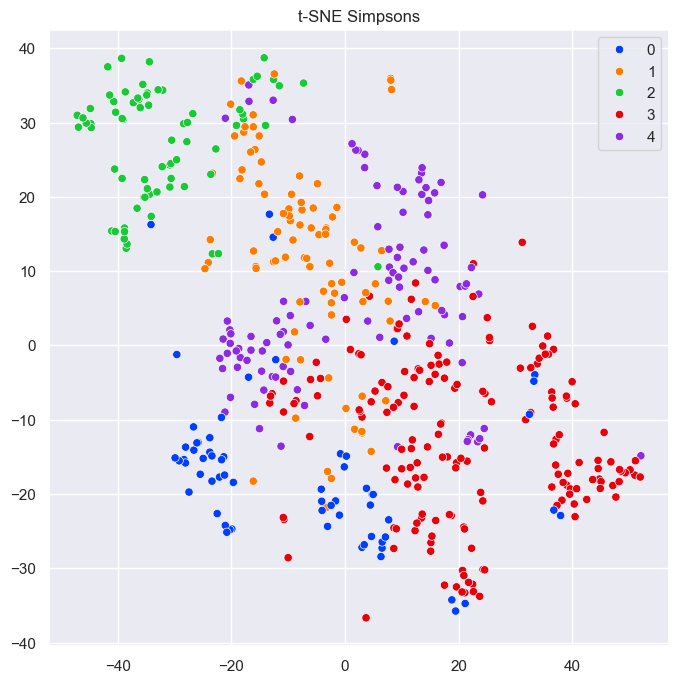

In [24]:
sns.set(rc={'figure.figsize':(8,8)})
palette = sns.color_palette("bright", len(set(pred)))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=pred, legend='full', palette=palette)
plt.title("t-SNE Simpsons")
plt.show()

I played around a bit with the perplexity, but it is proving to be difficult to visually the seperate clusters. It can be seen that the clustered labels are following a cluster. Cluster 3 is seperated in 2 parts. I will give it one last shot, by using PCA before doing k-means clustering. (I don't really expect it to help here.

# 4. PCA

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_s = scaler.fit_transform(data)

In [26]:
number_of_components = 516

from sklearn.decomposition import PCA

#Train het PCA algoritme op de training data
pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(data_s)

PCA(n_components=516, svd_solver='full')

In [27]:
(pca_model.explained_variance_ > 1).sum()

np.int64(512)

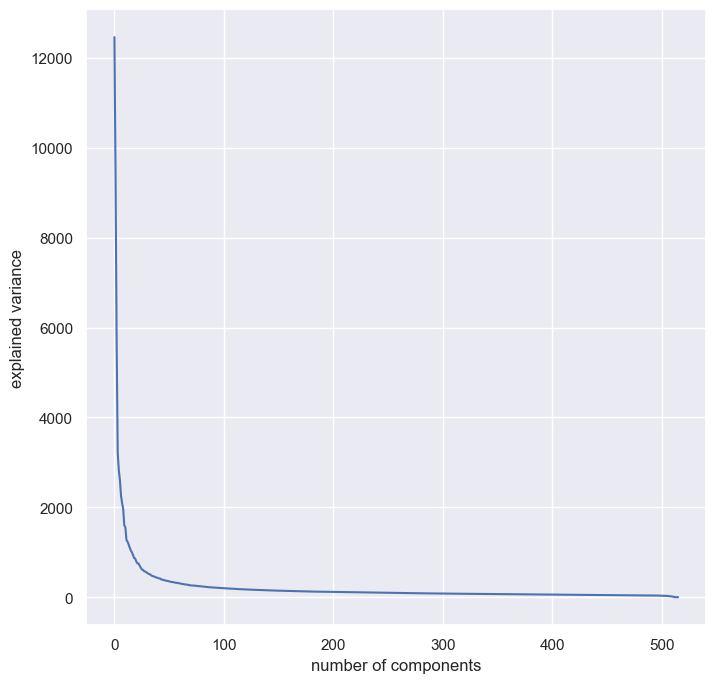

In [28]:
import matplotlib.pyplot as plt
plt.plot(pca_model.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

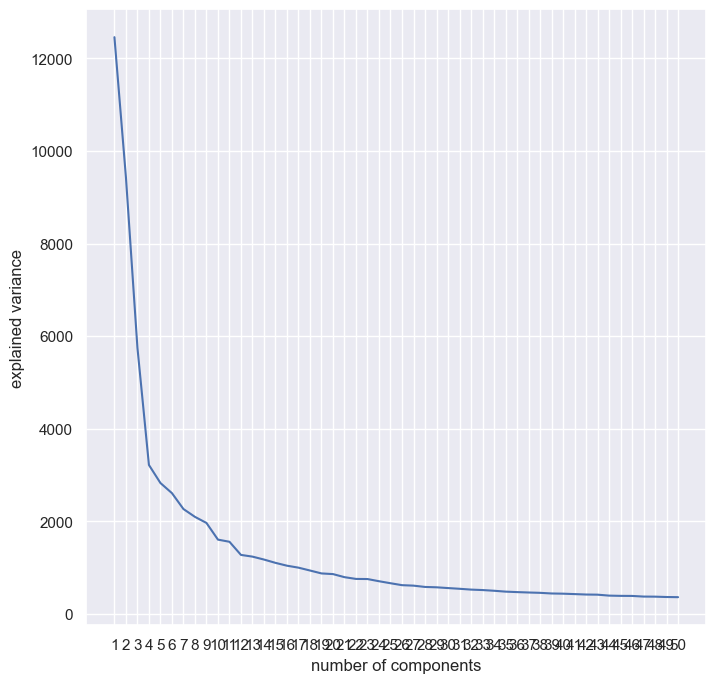

In [29]:
import numpy as np
EV = pca_model.explained_variance_[0:50]

plt.plot(EV)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(EV)), np.arange(1, len(EV)+1))  #Otherwise the x-axis starts at 1)
plt.show()

In [30]:
np.cumsum(pca_model.explained_variance_ratio_) 

array([0.10362924, 0.18207785, 0.22988275, 0.2566251 , 0.28012741,
       0.3018099 , 0.32063579, 0.33805511, 0.35438071, 0.36770898,
       0.38065095, 0.39123216, 0.40150481, 0.41125248, 0.42040486,
       0.42904715, 0.43733667, 0.4451144 , 0.45236799, 0.45950199,
       0.46608317, 0.47234844, 0.47859265, 0.48444413, 0.48993483,
       0.49507917, 0.50013759, 0.50496051, 0.50971982, 0.51434171,
       0.51883525, 0.52318217, 0.52744757, 0.53158612, 0.53556835,
       0.53946567, 0.54329175, 0.54705803, 0.55070793, 0.55432138,
       0.55786061, 0.56132167, 0.56475649, 0.56802128, 0.57124206,
       0.57445022, 0.57754389, 0.58062164, 0.58363672, 0.58662253,
       0.58955534, 0.59242374, 0.59524266, 0.59804811, 0.6008169 ,
       0.60352801, 0.60619303, 0.60885212, 0.61146939, 0.61404517,
       0.61656305, 0.61904398, 0.62150811, 0.62392797, 0.62629494,
       0.62865646, 0.63098754, 0.63329449, 0.63555286, 0.63774419,
       0.63992353, 0.6420981 , 0.64424844, 0.64638919, 0.64851

In [31]:
(np.cumsum(pca_model.explained_variance_ratio_) < 0.80).sum()

np.int64(180)

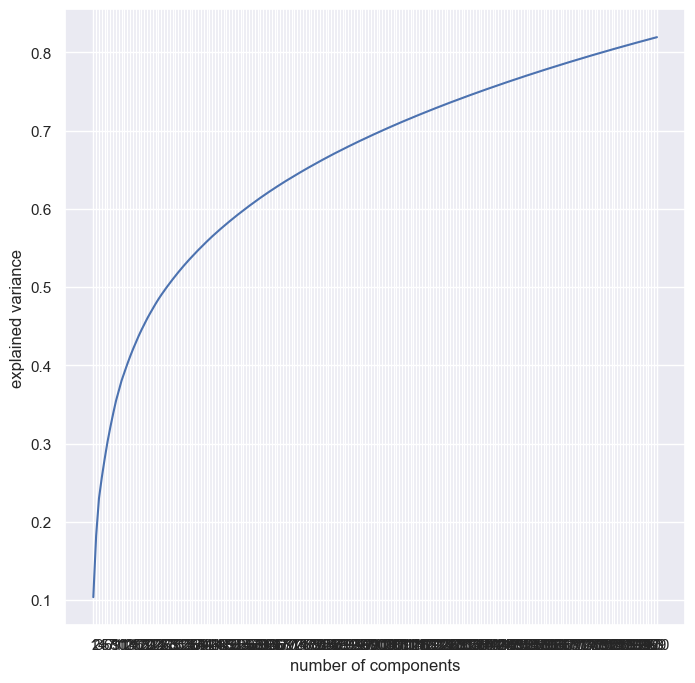

In [32]:
CS = np.cumsum(pca_model.explained_variance_ratio_)[0:200]

plt.plot(CS)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(len(CS)), np.arange(1, len(CS)+1))

plt.show()

In [33]:
number_of_components = 12

from sklearn.decomposition import PCA
#Train het PCA algoritme op de training data
pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(data)
pca_data= pca_model.transform(data)

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(pca_data)
pred_pca = kmeans.predict(pca_data)
pred_pca

array([4, 3, 1, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 4, 1, 4, 1, 4, 2, 1, 2, 1, 1, 2, 2, 4, 2, 2, 1,
       4, 3, 3, 3, 1, 1, 2, 1, 1, 4, 4, 2, 2, 3, 0, 0, 0, 2, 4, 3, 4, 2,
       2, 3, 4, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 2, 2, 1, 1, 3, 2, 2, 1, 2,
       1, 3, 4, 4, 3, 1, 1, 2, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 2, 1, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 1, 0, 0, 1, 1, 2, 3, 4, 0, 1, 1, 3, 4, 1, 4,
       4, 4, 3, 3, 2, 4, 1, 4, 1, 3, 4, 0, 4, 1, 4, 1, 4, 3, 4, 1, 0, 0,
       3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 2, 3, 3, 4, 1, 3, 3, 4, 4, 3, 1,
       4, 3, 2, 1, 1, 2, 1, 4, 1, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 3, 4,
       2, 2, 4, 2, 3, 2, 3, 4, 2, 4, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 4, 1, 3, 2, 0, 1, 0, 4, 2, 2, 4, 1, 1, 1, 4, 3, 2, 0, 0, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 0, 1, 4, 0, 0, 2, 4, 1, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 4, 1, 2, 4, 2, 1, 0, 0, 0, 1, 1, 2, 4, 0, 2, 4, 2, 4, 0,
       2, 2, 2, 0, 4, 4, 0, 0, 0, 0, 2, 0, 2, 4, 0,

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 517 samples in 0.001s...
[t-SNE] Computed neighbors for 517 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 517 / 517
[t-SNE] Mean sigma: 18.565716
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.387184
[t-SNE] KL divergence after 1000 iterations: 0.879184


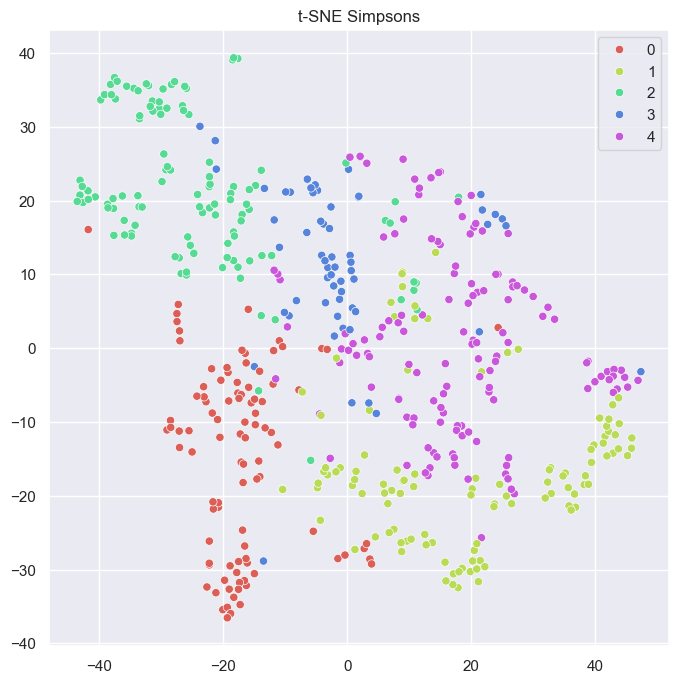

In [35]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(verbose=1, perplexity=15, random_state=124 )
X_embedded_pca = tsne.fit_transform(pca_data)

sns.set(rc={'figure.figsize':(8,8)})
# colors
palette = sns.color_palette("hls", len(set(pred_pca)))
#
# plot
sns.scatterplot(x=X_embedded_pca[:,0], y=X_embedded_pca[:,1], hue=pred_pca, legend='full', palette= palette)
plt.title("t-SNE Simpsons")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

In [36]:
cluster_0 = np.arange(0,data.shape[0])[pred_pca == 0]
cluster_1 = np.arange(0,data.shape[0])[pred_pca == 1]
cluster_2 = np.arange(0,data.shape[0])[pred_pca == 2]
cluster_3 = np.arange(0,data.shape[0])[pred_pca == 3]
cluster_4 = np.arange(0,data.shape[0])[pred_pca == 4]

<Figure size 1500x1500 with 0 Axes>

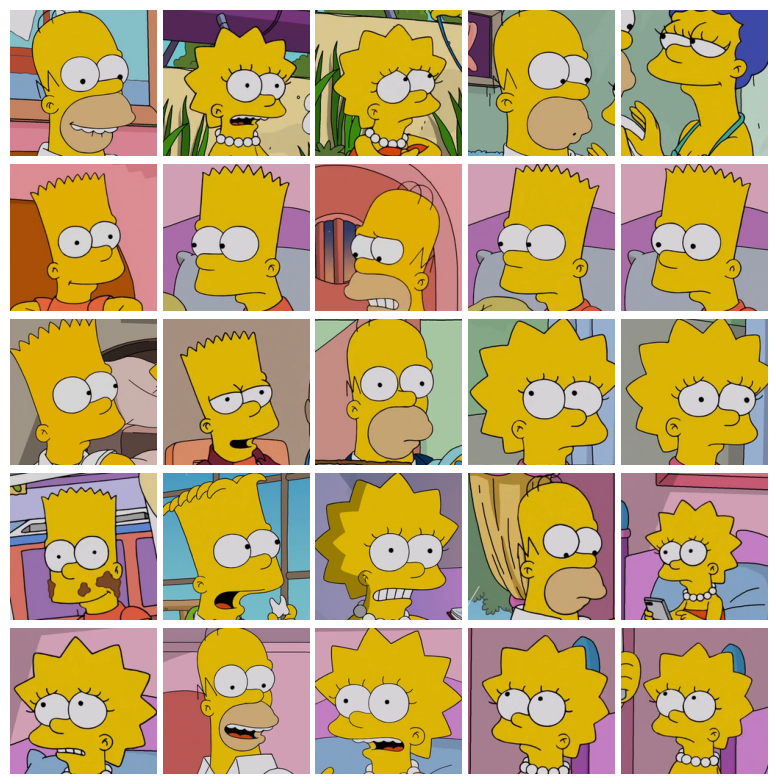

In [37]:
plt.figure(figsize=(15, 15))  
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i , ax in enumerate(axes): 
    im = np.array(data.iloc[cluster_4[i],:]).reshape(200,200,3)
    ax.imshow(im)
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

the t-SNE map looks better, so the clustering is better. Too bad it is still clustering on the wrong thing.